## NLP4. 뉴스 카테고리 다중분류

In [1]:
# 모든 프로젝트에 해당되는 패키지를 먼저 임포트
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


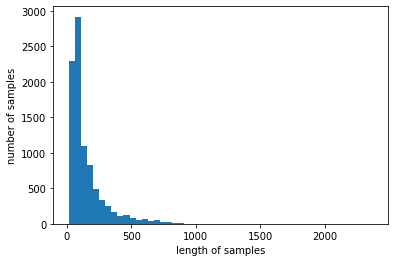

In [3]:
#데이터 분포 파악
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len,x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

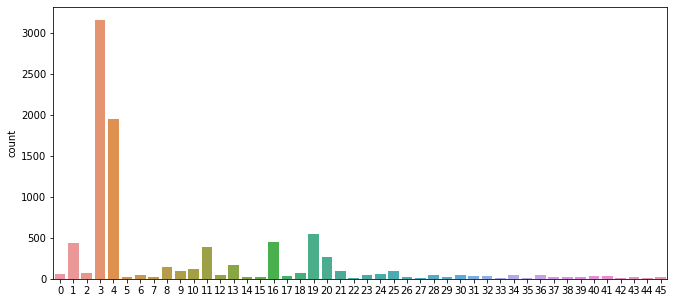

In [4]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [5]:
# 텍스트데이터로 복원
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 인덱스 +3
index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [6]:
# 전체 학습데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [7]:
# 전체 테스트데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [8]:
# DTM 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 테스트데이터
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환

(8982, 26506)


In [9]:
# TF-IDF Matrix확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 테스트데이터
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 26506)


### 모델별 정확도 예측(num_words=None)

In [10]:
# 결과값 비교를 위한 리스트 선언
classifier_list = ["MultinomialNB", "ComplementNB", "Logistic Regression", "LinearSVC", "Decision Tree", "Random Forest", "GradientBoostingClassifier", "LGBM", "Voting"]
classifier_answer_list = []

**나이브 베이즈 분류기**

In [11]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.5997328584149599


**Complement Naive Bayes Classifier(CNB)**

In [12]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.7649154051647373


**로지스틱 회귀(Logistic Regression)**

In [13]:
lr = LogisticRegression(C=1.0, max_iter=1000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.7920747996438112


**선형 서포트 벡터 머신**

In [14]:
lsvc = LinearSVC(C=1.0, max_iter=1000, penalty='l2', dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.8294746215494212


**결정 트리(Decision Tree)**

In [15]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6211041852181657


**랜덤 포레스트**

In [16]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6544968833481746


**그래디언트 부스팅 트리(Gradient Boosting Tree Classifier)**

In [17]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.7702582368655387


**Light GBM(LGBM)**

In [18]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth='10',num_leaves=2**10,learning_rate=0.01)
clf.fit(tfidfv, y_train)

y_pred = clf.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, y_pred))
classifier_answer_list.append(accuracy_score(y_test, y_pred))

정확도: 0.794746215494212


**보팅(Voting) (로지스틱 회귀+CNB+그래디언트 부스팅 트리 세 가지를 사용)**

In [19]:
voting_classifier = VotingClassifier(estimators=[
    ('lr',LogisticRegression(C=0.1, penalty='l2')),
    ('cb',ComplementNB()),
    ('grbt',GradientBoostingClassifier(random_state=0))
], voting='soft',n_jobs=-1)
voting_classifier.fit(tfidfv,y_train)

predicted = voting_classifier.predict(tfidfv_test) 
print("정확도:",accuracy_score(y_test,predicted))
classifier_answer_list.append(accuracy_score(y_test,predicted))

정확도: 0.7791629563668745


In [20]:
print("빈도수 제한없을 때 정확도 리스트")
print()
for x in range(len(classifier_list)):
    print(classifier_list[x],":",classifier_answer_list[x].round(2))

빈도수 제한없을 때 정확도 리스트

MultinomialNB : 0.6
ComplementNB : 0.76
Logistic Regression : 0.79
LinearSVC : 0.83
Decision Tree : 0.62
Random Forest : 0.65
GradientBoostingClassifier : 0.77
LGBM : 0.79
Voting : 0.78


## 2. 빈도수 상위 5,000개의 단어만 사용

In [21]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


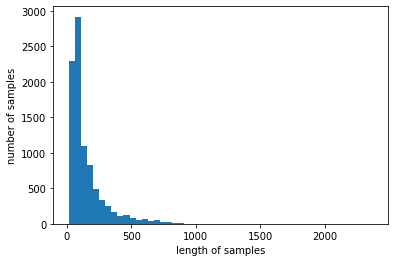

In [22]:
# 데이터 분포 파악
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 1만개였을 때와 큰 차이 없음

<AxesSubplot:ylabel='count'>

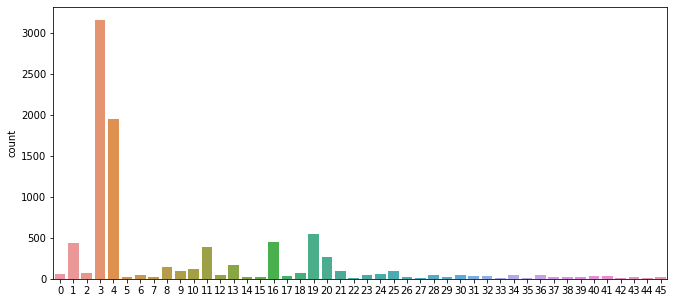

In [23]:
# 타겟데이터 파악
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)

# 1만개였을 때와 큰 차이 없음

In [24]:
# 텍스트데이터로 복원
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 인덱스 +3
index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [25]:
# 전체 학습데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [26]:
# 전체 테스트데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [27]:
# DTM 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 테스트데이터
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환

(8982, 4867)


In [28]:
# TF-IDF Matrix확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 테스트데이터
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 4867)


In [29]:
# 결과값 비교를 위한 리스트 선언
classifier_list = ["MultinomialNB", "ComplementNB", "Logistic Regression", "LinearSVC", "Decision Tree", "Random Forest", "GradientBoostingClassifier", "LGBM", "Voting"]
classifier_answer_list = []

**나이브 베이즈 분류기**

In [30]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6731967943009796


**Complement Naive Bayes Classifier(CNB)**

In [31]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.7707034728406055


**로지스틱 회귀(Logistic Regression)**

In [32]:
lr = LogisticRegression(C=0.1, penalty='l2', max_iter=100)
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6665182546749777


**선형 서포트 벡터 머신**

In [33]:
lsvc = LinearSVC(C=0.1, penalty='l2', max_iter=100, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.821460373998219


**결정 트리(Decision Tree)**

In [34]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6179875333926982


**랜덤 포레스트(Random Forest)**

In [35]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.701246660730187


**그래디언트 부스팅 트리(Gradient Boosting Tree) Classifier**

In [36]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.767586821015138


**Light GBM(LGBM)**

In [37]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth=10,num_leaves=2**10,learning_rate=0.01)
clf.fit(tfidfv, y_train)

y_pred=clf.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, y_pred))
classifier_answer_list.append(accuracy_score(y_test, y_pred))

정확도: 0.7974176313446126


**보팅(Voting)(로지스틱 회귀+CNB+그래디언트 부스팅 트리)**

In [38]:
voting_classifier = VotingClassifier(estimators=[
    ('lr',LogisticRegression(C=0.1, penalty='l2', max_iter=100)),
    ('cb',ComplementNB()),
    ('grbt',GradientBoostingClassifier(random_state=0))
],voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print("정확도:",accuracy_score(y_test, predicted))
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.7747105966162066


In [39]:
# 전체 정리

print("빈도수 상위 5,000개의 단어만 사용했을 때 정확도 리스트")

for x in range(len(classifier_list)):
    print(classifier_list[x], ":", classifier_answer_list[x].round(2))

빈도수 상위 5,000개의 단어만 사용했을 때 정확도 리스트
MultinomialNB : 0.67
ComplementNB : 0.77
Logistic Regression : 0.67
LinearSVC : 0.82
Decision Tree : 0.62
Random Forest : 0.7
GradientBoostingClassifier : 0.77
LGBM : 0.8
Voting : 0.77


## 3. 직접 단어갯수를 설정 (num_words = 7500)

In [72]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=7500, test_split=0.2)

In [73]:
#텍스트데이터로 복원
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 인덱스 +3
index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [74]:
# 전체 학습데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [75]:
# 전체 테스트데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [76]:
# DTM 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 테스트데이터
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환

(8982, 7296)


In [77]:
# TF-IDF Matrix확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 테스트데이터
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 7296)


In [78]:
# 결과값 비교를 위한 리스트 선언
classifier_list = ["MultinomialNB", "ComplementNB", "Logistic Regression", "LinearSVC", "Decision Tree", "Random Forest", "GradientBoostingClassifier", "LGBM", "Voting"]
classifier_answer_list = []

**나이브 베이즈 분류기**

In [79]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6642920747996438


**Complement Naive Bayes Classifier(CNB)**

In [80]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.7693677649154052


**로지스틱 회귀(Logistic Regression)**

In [81]:
lr = LogisticRegression(C=0.1, penalty='l2', max_iter=100)
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6620658949243099


**선형 서포트 벡터 머신**

In [82]:
lsvc = LinearSVC(C=0.1, penalty='l2', max_iter=100, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.8223508459483526


**결정 트리(Decision Tree)**

In [83]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6202137132680321


**랜덤 포레스트(Random Forest)**

In [84]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.6878895814781835


**그래디언트 부스팅 트리(Gradient Boosting Tree) Classifier**

In [85]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.7693677649154052


**Light GBM(LGBM)**

In [86]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth=10,num_leaves=2**10,learning_rate=0.01)
clf.fit(tfidfv, y_train)

y_pred=clf.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, y_pred))
classifier_answer_list.append(accuracy_score(y_test, y_pred))

정확도: 0.792520035618878


**보팅(Voting) (로지스틱 회귀+CNB+그래디언트 부스팅 트리 세 가지를 사용)**

In [87]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=0.1, penalty='l2',max_iter=100)),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도: 0.7773820124666073


In [88]:
# 전체 정리

print("빈도수 상위 7,500개의 단어만 사용했을 때 정확도 리스트")

for x in range(len(classifier_list)):
    print(classifier_list[x], ":", classifier_answer_list[x].round(2))

빈도수 상위 7,500개의 단어만 사용했을 때 정확도 리스트
MultinomialNB : 0.66
ComplementNB : 0.77
Logistic Regression : 0.66
LinearSVC : 0.82
Decision Tree : 0.62
Random Forest : 0.69
GradientBoostingClassifier : 0.77
LGBM : 0.79
Voting : 0.78


## 4. 딥러닝 모델과 비교

In [89]:
import numpy as np
from keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

In [90]:
# 데이터 로드
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [91]:
print(train_data.shape, train_labels.shape)

(8982,) (8982,)


In [92]:
print(test_data.shape, test_labels.shape)

(2246,) (2246,)


In [93]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [94]:
# 원핫인코딩
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [95]:
from keras import models
from keras import layers

# 모델 생성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 클래스가 46개
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [96]:
# 모델 컴파일 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
# 데이터 나누기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [98]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 3.2105 - accuracy: 0.3252 - val_loss: 2.4703 - val_accuracy: 0.4910
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.9408 - accuracy: 0.6229 - val_loss: 1.5992 - val_accuracy: 0.6540
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.3284 - accuracy: 0.7223 - val_loss: 1.2669 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0112 - accuracy: 0.7851 - val_loss: 1.1053 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.7863 - accuracy: 0.8324 - val_loss: 1.0083 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6123 - accuracy: 0.8761 - val_loss: 0.9445 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4760 - accuracy: 0.9018 - val_loss: 0.9036 - val_accuracy: 0.8210
Epoch 8/20
16

In [99]:
# 모델 평가
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0994 - accuracy: 0.7996


[1.0994364023208618, 0.7996438145637512]

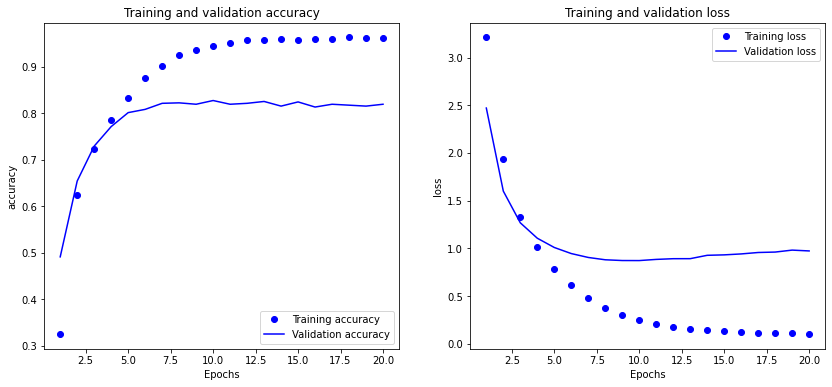

In [122]:
# 시각화
import matplotlib.pyplot as plt

fig = plt.subplots(1,2,figsize=(14,6))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(121)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.subplot(122)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<비고>
* num_words 가 10000 일 때 9가지 모델 방식 중에서 제일 성능이 뛰어난 모델 :     
  선형 서포트 벡터 머신    
* num_words 가 5000 일 때 9가지 모델 방식 중에서 제일 성능이 뛰어난 모델 :     
  선형 서포트 벡터 머신    
* num_words 가 5000과 10000의 중간, 즉 7500 일 때 9 가지 모델 방식 중에서   
  제일 성능이 뛰어난 모델 :       
  선형 서포트 벡터 머신      
      
  -> 이유 추측 : 선형 서포트 벡터 머신은 말그대로 벡터화에 최적화된 모델입니다.        
     아무래도 NLP에서 문장을 벡터로 임베딩하는 과정이 있다보니 이런 점에서 이   
     모델이 잘 들어맞는 것이 아닌가 개인적으로 생각합니다.       
     그 뒤를 요즘들어 캐글에서 각광받고 있다는 LGBM이 뒤따랐습니다.      

* CNB와 Logistic Regression 그리고 Gradient Boosting 분류기를 합친 봇팅 효과는     
  미미하거나 반대로 정확도가 조금 줄어드는 것으로 나타났습니다.    

* 딥러닝 모델과의 비교에서는 선형 서포트 벡터 머신이 0.8 이상의 정확도를 보였는데       
  딥러닝 모델은 0.79대의 정확도가 나와 서포트 벡터 머신이 딥러닝 모델에 뒤쳐지지       
  않는다는 점을 보여줬습니다.     
          
  -> 이유 추측 : 저의 노트북에서의 딥러닝 모델 구축 과정도 선형 서포트 벡터 머신과    
     같이 벡터화를 거칩니다. 따라서 동일한 데이터셋과 전처리를 거친다면 결과가     
     비슷할 것이라고 예상했습니다.  